

#### 我查询了泰坦尼克号的文档和影视资料，得知灾难发生时许多游客发扬了绅士精神，老弱妇女儿童先行，现在想通过数据探究一下几个问题：
>1 幸存者的性别是否影响了幸存几率(女性更容易幸存)

>2 幸存者中是否是儿童和老年人得到更多的幸存机会

In [14]:
#/usr/bin/env python
# -*- coding: UTF-8 -*-
% matplotlib inline
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltt
titanic_data=pd.read_csv("/Users/peng/P4/titanic-data.csv") #修改为自己的文件路径

#### Cabin和Age，Embarked 存在空缺值

In [15]:
#观察总数据
titanic_data.info()
# noise_df = pd.DataFrame(np.random.random(titanic_data.shape),columns=titanic_data.columns)

titanic_data["count"]=1#对原始数据添加一列，方便统计人数
titanic_data.pop('Cabin')
titanic_data=titanic_data.dropna(axis=0,how='any')
#对Age变量进行分组 0-90，每10岁为一组
bins=np.arange(0,90,10)
titanic_data['Age_group']=pd.cut(titanic_data['Age'],bins)

#### 将原始总数据进行了初步加工，对Age变量进行分组 0-90，每10岁为一组，添加了count列用于统计人数，删除了Cabin列，因为船舱等级与本次数据探究无关，删除了部分有空缺无数据的行

Text(0.5,1,u'Survived_groupby_Sex')

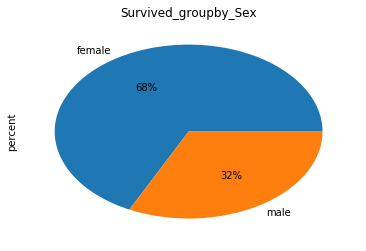

In [16]:
#计算总体幸存率
titanic_count=titanic_data['count'].count()
survived_count=titanic_data.groupby('Survived')['count'].count()
survived_percent=(survived_count/titanic_count)



#将数据进行分组 取出幸存者
ax=survive_sex_data.plot(kind='pie',autopct='%.0f%%')
ax.set_ylabel('percent')
ax.set_title("Survived_groupby_Sex")


#### 幸存者中68%是女性，男性占比32%

Text(0.5,1,u'Survived_groupby_Age')

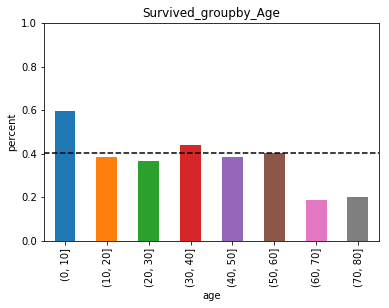

In [17]:
survied_count=survive_titanic_data.groupby('Age_group')['count'].count()
all_count=titanic_data.groupby('Age_group')['count'].count()
a=survived_percent[1:].add((survied_count/all_count),fill_value=0)
a=titanic_data.groupby("Age_group")['Survived'].mean()
a.index.rename('age',inplace=True)
ax=a.plot(kind='bar',)
ax.set_ylabel('percent')
ax.set_ylim(0,1)
ax.axhline(survived_percent[1], c='black', ls='--')# -- 标记出总体幸存比例
ax.set_title("Survived_groupby_Age")

#### 0-10岁儿童幸存比例最高 ，其次是30-40岁人，第三是50-60的老年人

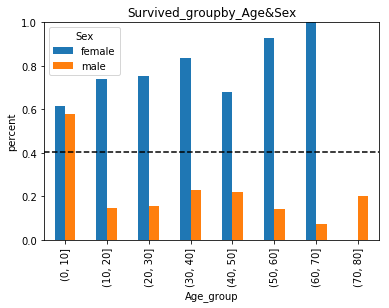

In [18]:
ax=titanic_data.groupby(["Age_group","Sex"])['Survived'].mean().unstack().plot(kind='bar')
ax.set_ylabel('percent')
ax.set_ylim(0,1)
ax.set_title("Survived_groupby_Age&Sex")
ax.axhline(survived_percent[1], c='black', ls='--')# -- 标记出总体幸存比例



#### 明显看出女性在每个年龄段幸存比例都比男性高，而且都高出了总体幸存比例，女性中60-70老年人幸存比例最高，在男性中只有0-10儿童最高

# 泰坦尼克号人员数据分析报告

### 作者：peng

> 项目背景：选取了泰坦尼克号上人员数据进行分析，研究幸存几率是否与性别有关，是否与年纪有关。

> 结论： 幸存者中，女性占大多数，得出女性更容易幸存，
   总体来看，还是0-10岁儿童获得了最高的幸存几率，其次是30-40岁人，第三是50-60的老年人。女性中60-70老年人幸存比例最高，在男性中是0-10儿童最高,最后结论如下：
   
     >1 幸存者的性别影响了幸存几率(女性更容易幸存)

     >2 幸存者中儿童和老年人得到更多的幸存机会

## 本次分析调查并不能推广，因为我们拿到的是只有不到1000人的数据，并不是全部游客的数据，而且数据内容不完全完整，部分含有空缺值的已经被删除，这有可能影响整体调查结果。